In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("csvs\\HR_comma_sep.csv")
#df.replace(['low', 'medium', 'high'], [1,2,3], inplace = True) #maps dictionary to numbers
df.drop(['Department'], axis = 1, inplace = True)
df.head()
#pd.isna(df).sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [36]:
##finding variables with highest coefs
left = df[df.left==1]
retained = df[df.left==0]

In [42]:
df_grouped = df.groupby('left')

In [46]:
df_grouped.describe()

satisfaction_level                                                    \
                  count      mean       std   min   25%   50%   75%   max   
left                                                                        
0               11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00   
1                3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92   

     last_evaluation            ... Work_accident      promotion_last_5years  \
               count      mean  ...           75%  max                 count   
left                            ...                                            
0            11428.0  0.715473  ...           0.0  1.0               11428.0   
1             3571.0  0.718113  ...           0.0  1.0                3571.0   

                                                   
          mean       std  min  25%  50%  75%  max  
left                                               
0     0.026251  0.159889  0.0  0.0  0.0  0.0  1.0  
1     0.005321  0.072759  0.0  0.0  0.0  0.0  1.0  

[2 rows x 56 columns]

<Axes: xlabel='salary'>

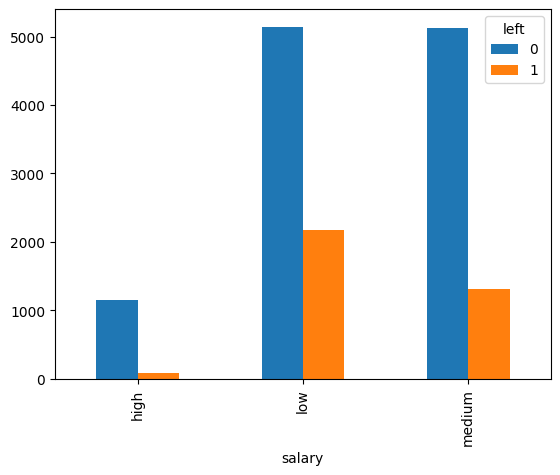

In [50]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

#most weighted variables, satisfaction level, avg. monthly hours, salary, promotion_last_5years

In [52]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [68]:
#create one-hot encoding for salary
dummies = pd.get_dummies(df.salary,dtype=float, prefix="salary")
dummies

,salary_high,salary_low,salary_medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
14994,0.0,1.0,0.0
14995,0.0,1.0,0.0
14996,0.0,1.0,0.0
14997,0.0,1.0,0.0


In [74]:
new= pd.concat([subdf, dummies], axis = 1)
new.drop(['salary','salary_low'],axis = 1, inplace = True)
X = new

In [75]:
##creating regression model
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 10) 

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [80]:
model.coef_

array([[-3.73485471e+00,  2.19252343e-03, -5.72554373e-01,
        -1.91464988e+00, -4.80608792e-01]])

In [81]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
model.score(X_test,y_test)

0.7766666666666666